# CO2 and GHG Emission Data by Country

## Import Libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import country_converter
import time
import moviepy
from matplotlib.animation import FuncAnimation

## Import data

In [102]:
df = pd.read_csv('emission data.csv')
df.head()




Country  1751  1752  1753  1754  1755  1756  1757  1758  1759  \
0       Afghanistan     0     0     0     0     0     0     0     0     0   
1            Africa     0     0     0     0     0     0     0     0     0   
2           Albania     0     0     0     0     0     0     0     0     0   
3           Algeria     0     0     0     0     0     0     0     0     0   
4  Americas (other)     0     0     0     0     0     0     0     0     0   

   ...          2008          2009          2010          2011          2012  \
0  ...  8.515264e+07  9.191295e+07  1.003652e+08  1.125912e+08  1.233332e+08   
1  ...  3.183077e+10  3.301904e+10  3.421283e+10  3.541120e+10  3.664504e+10   
2  ...  2.287948e+08  2.331696e+08  2.377643e+08  2.430001e+08  2.479062e+08   
3  ...  2.894820e+09  3.015005e+09  3.132819e+09  3.252626e+09  3.380736e+09   
4  ...  7.746025e+10  7.961787e+10  8.187178e+10  8.416656e+10  8.654197e+10   

           2013          2014          2015          2016          2017  
0  1.333337e+08  1.431228e+08  1.532303e+08  1.654882e+08  1.785029e+08  
1  3.789569e+10  3.918617e+10  4.047518e+10  4.178583e+10  4.311757e+10  
2  2.529662e+08  2.586784e+08  2.646261e+08  2.708990e+08  2.772782e+08  
3  3.513171e+09  3.656348e+09  3.806940e+09  3.957319e+09  4.107870e+09  
4  8.894874e+10  9.139192e+10  9.382747e+10  9.624253e+10  9.864116e+10  

[5 rows x 268 columns]

## Create World

In [103]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world.name!="Antarctica"]
world.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [104]:
print(country_converter.convert(names=list(df.Country), to='ISO2'))

Africa not found in regex
Americas (other) not found in regex
Antarctic Fisheries not found in regex
Asia and Pacific (other) not found in regex
EU-28 not found in regex
Europe (other) not found in regex
Kyrgysztan not found in regex
Middle East not found in regex
Timor not found in regex
World not found in regex


['AF', 'not found', 'AL', 'DZ', 'not found', 'AD', 'AO', 'AI', 'not found', 'AG', 'AR', 'AM', 'AW', 'not found', 'AU', 'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ', 'BM', 'BT', 'BO', 'BQ', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF', 'BI', 'KH', 'CM', 'CA', 'CV', 'KY', 'CF', 'TD', 'CL', 'CN', 'CX', 'CO', 'KM', 'CG', 'CK', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'CZ', 'CD', 'DK', 'DJ', 'DM', 'DO', 'not found', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE', 'ET', 'not found', 'FO', 'FK', 'FJ', 'FI', 'FR', 'GF', 'PF', 'GA', 'GM', 'GE', 'DE', 'GH', 'GI', 'GR', 'GL', 'GD', 'GP', 'GT', 'GN', 'GW', 'GY', 'HT', 'HN', 'HK', 'HU', 'IS', 'IN', 'ID', 'IR', 'IQ', 'IE', 'IL', 'IT', 'JM', 'JP', 'JO', 'KZ', 'KE', 'KI', 'KW', 'not found', 'KG', 'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI', 'LT', 'LU', 'MO', 'MK', 'MG', 'MW', 'MY', 'MV', 'ML', 'MT', 'MH', 'MQ', 'MR', 'MU', 'MX', 'FM', 'not found', 'MD', 'MN', 'ME', 'MS', 'MA', 'MZ', 'MM', 'NA', 'NR', 'NP', 'NL', 'NC', 'NZ', 'NI', 'NE', 'NG', 'NU', 'KP', '

In [105]:
country_names = list(df.Country)
iso3 = country_converter.convert(names=country_names, to='ISO3')

Africa not found in regex
Americas (other) not found in regex
Antarctic Fisheries not found in regex
Asia and Pacific (other) not found in regex
EU-28 not found in regex
Europe (other) not found in regex
Kyrgysztan not found in regex
Middle East not found in regex
Timor not found in regex
World not found in regex


In [106]:
df.Country = iso3
df = df[df.Country != 'not found']

In [107]:
df.head()

Country  1751  1752  1753  1754  1755  1756  1757  1758  1759  ...  \
0     AFG     0     0     0     0     0     0     0     0     0  ...   
2     ALB     0     0     0     0     0     0     0     0     0  ...   
3     DZA     0     0     0     0     0     0     0     0     0  ...   
5     AND     0     0     0     0     0     0     0     0     0  ...   
6     AGO     0     0     0     0     0     0     0     0     0  ...   

           2008          2009          2010          2011          2012  \
0  8.515264e+07  9.191295e+07  1.003652e+08  1.125912e+08  1.233332e+08   
2  2.287948e+08  2.331696e+08  2.377643e+08  2.430001e+08  2.479062e+08   
3  2.894820e+09  3.015005e+09  3.132819e+09  3.252626e+09  3.380736e+09   
5  9.258928e+06  9.775552e+06  1.029218e+07  1.078315e+07  1.127046e+07   
6  3.316716e+08  3.592371e+08  3.881015e+08  4.182437e+08  4.514295e+08   

           2013          2014          2015          2016          2017  
0  1.333337e+08  1.431228e+08  1.532303e+08  1.654882e+08  1.785029e+08  
2  2.529662e+08  2.586784e+08  2.646261e+08  2.708990e+08  2.772782e+08  
3  3.513171e+09  3.656348e+09  3.806940e+09  3.957319e+09  4.107870e+09  
5  1.174678e+07  1.220845e+07  1.268569e+07  1.319719e+07  1.371738e+07  
6  4.838026e+08  5.182603e+08  5.530214e+08  5.883724e+08  6.237623e+08  

[5 rows x 268 columns]

In [108]:
columns = list(world.columns)
columns[columns.index("iso_a3")] = "Country"
world.columns = columns

In [109]:
world = world.join(df.set_index('Country'), on='Country')

C:\Users\Aidan\anaconda3\lib\site-packages\geopandas\plotting.py:673: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


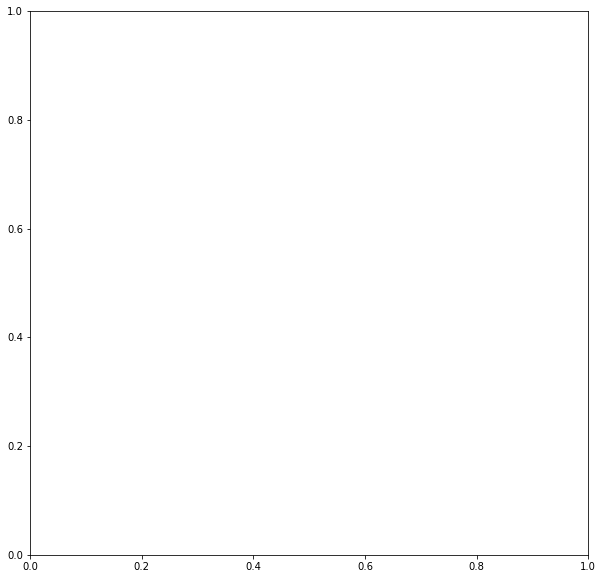

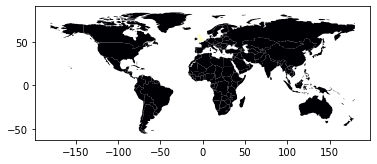

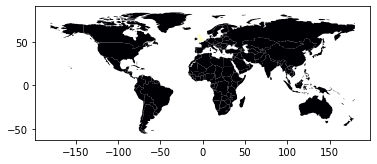

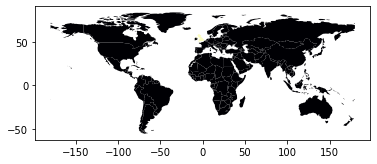

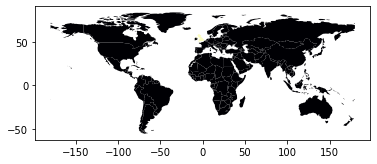

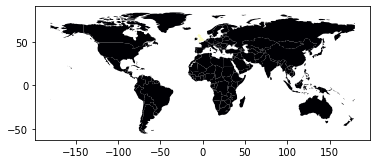

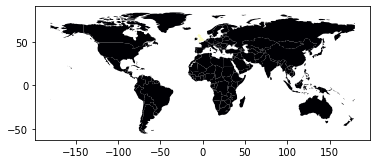

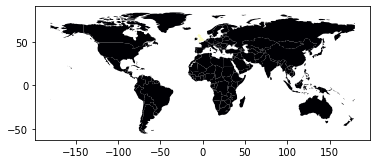

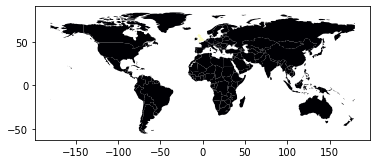

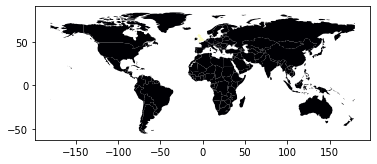

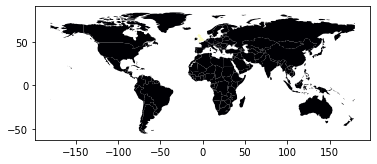

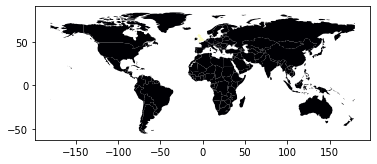

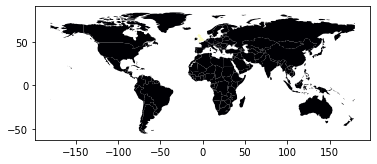

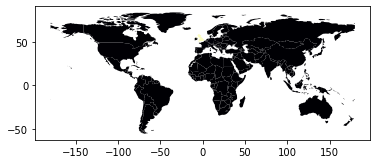

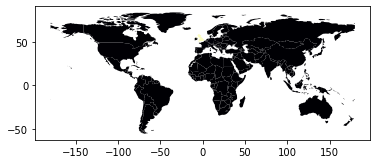

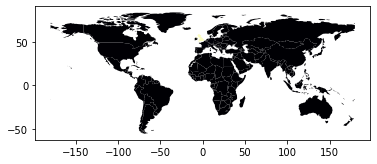

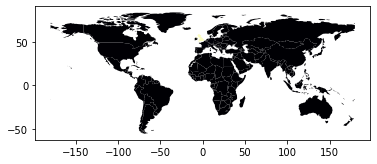

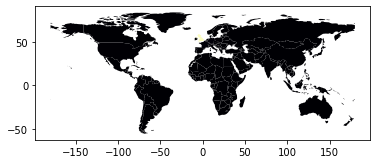

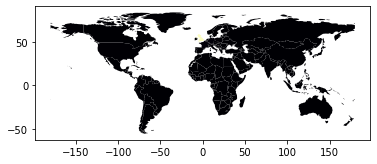

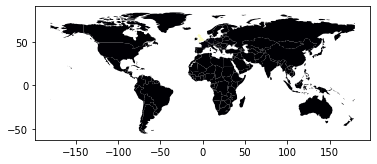

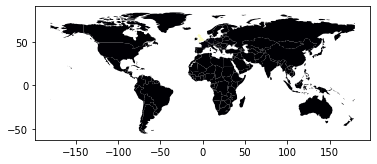

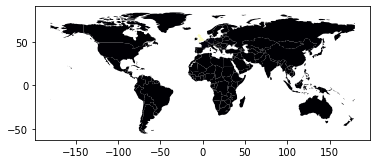

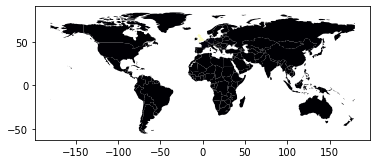

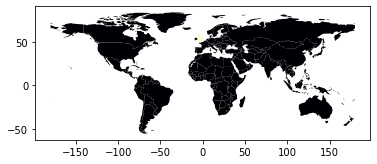

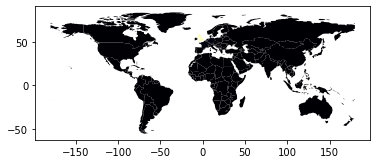

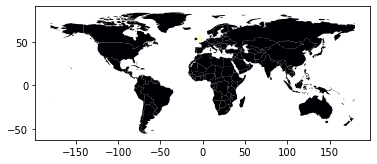

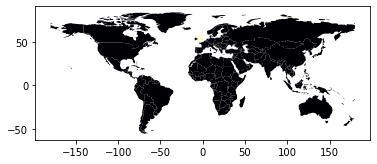

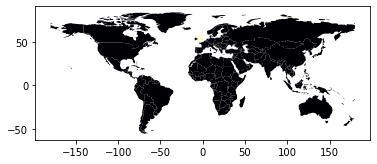

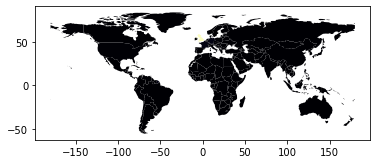

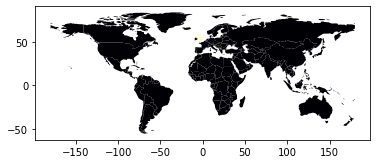

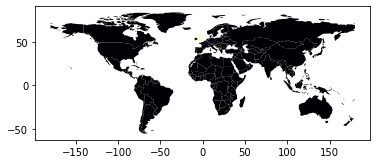

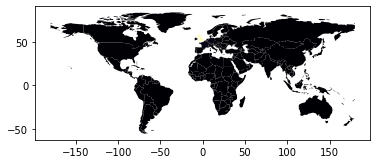

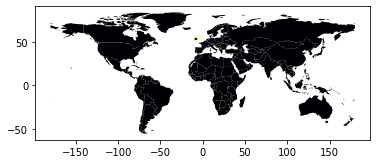

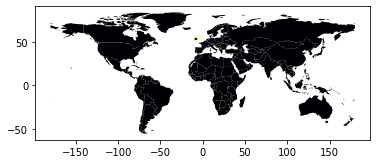

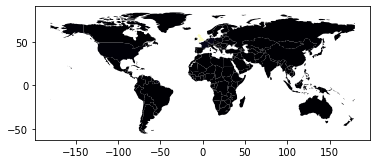

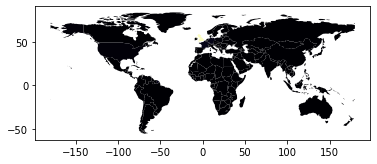

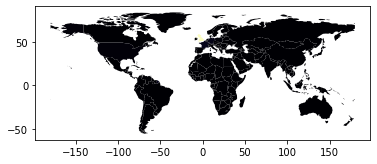

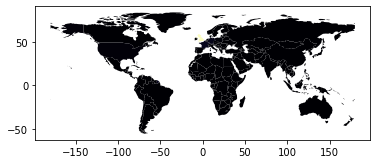

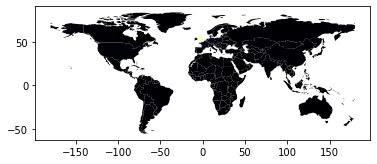

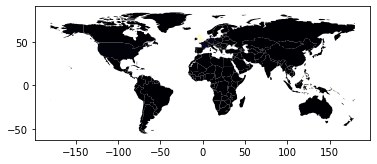

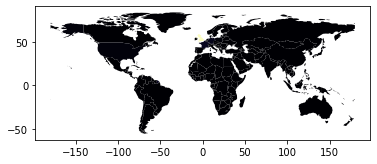

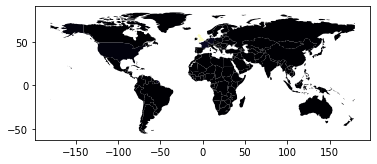

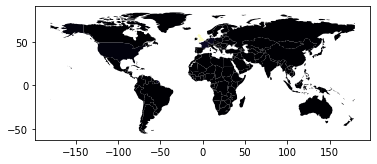

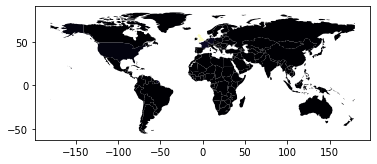

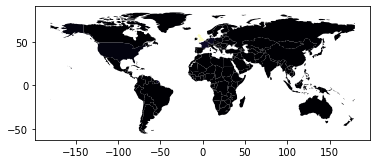

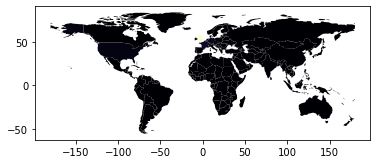

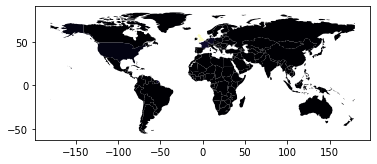

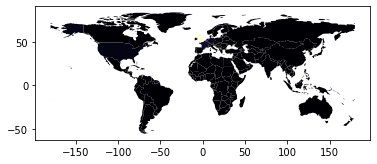

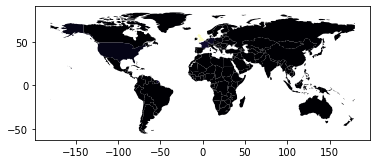

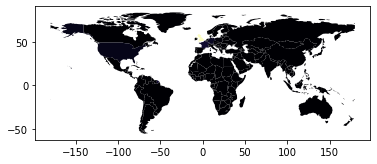

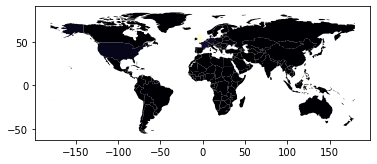

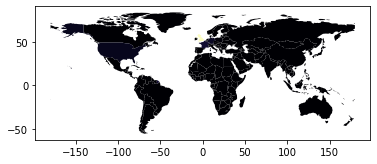

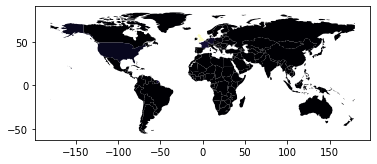

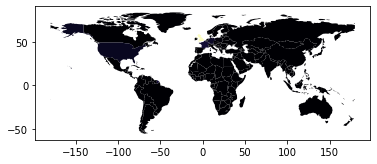

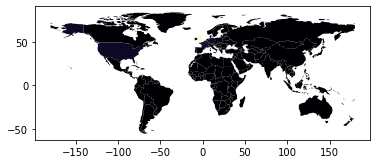

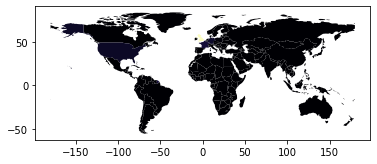

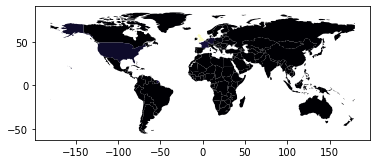

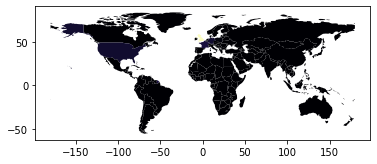

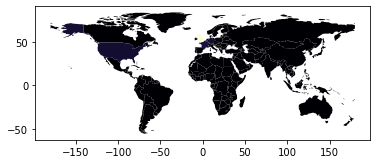

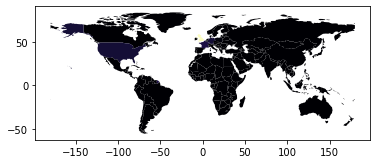

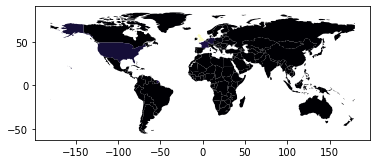

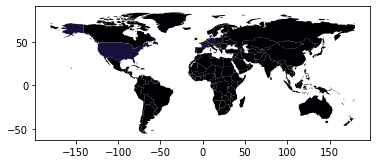

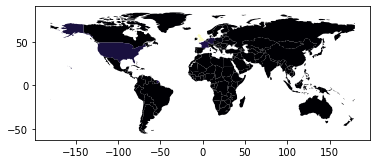

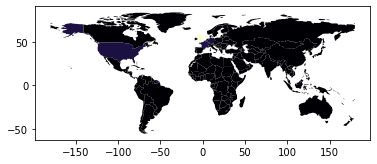

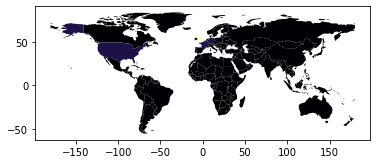

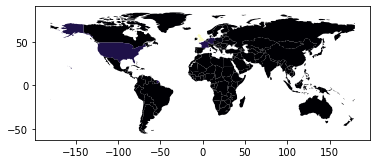

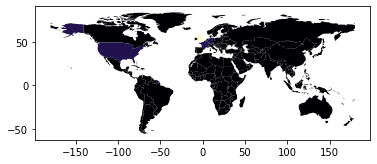

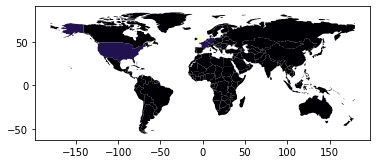

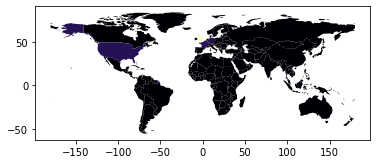

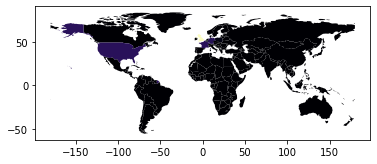

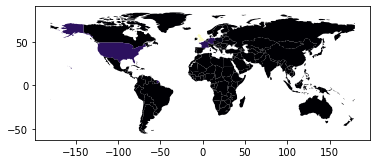

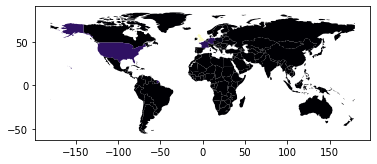

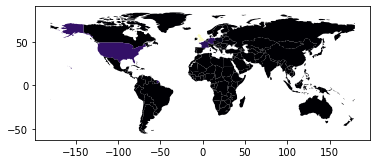

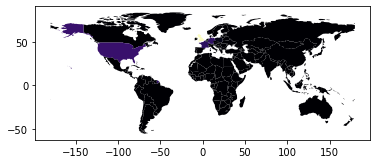

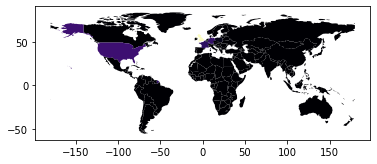

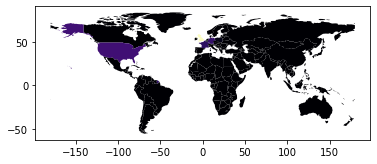

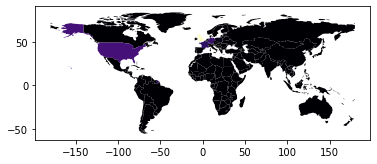

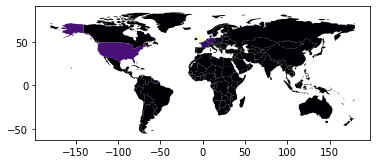

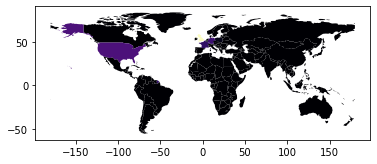

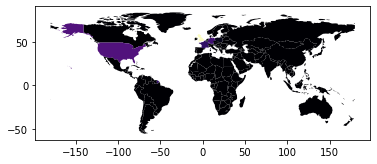

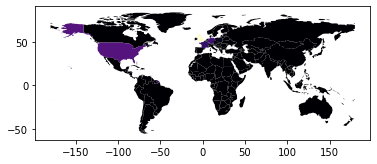

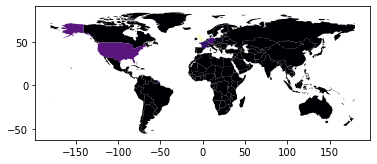

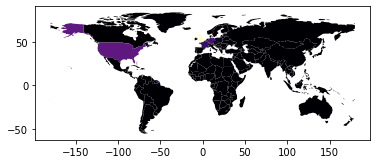

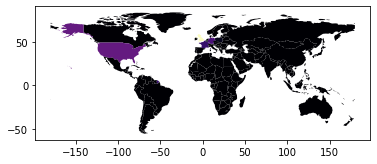

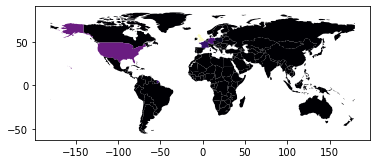

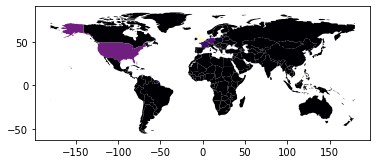

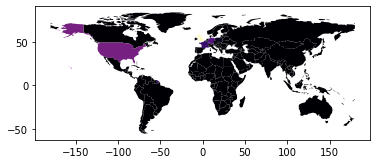

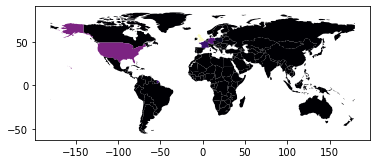

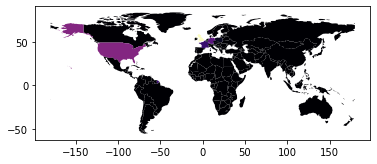

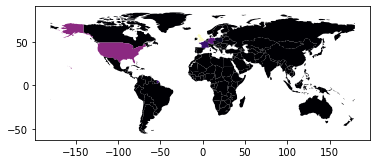

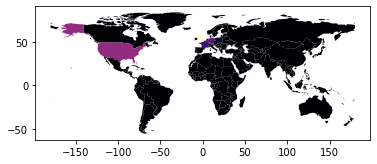

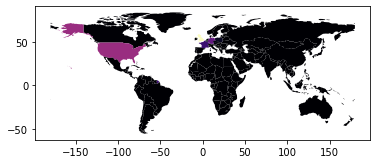

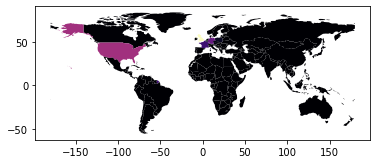

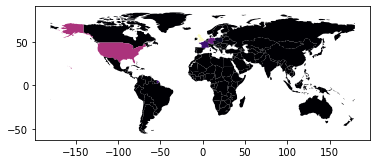

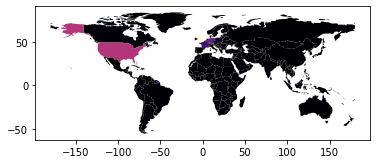

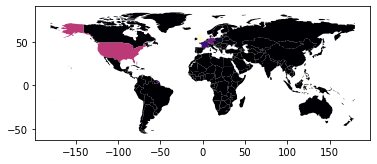

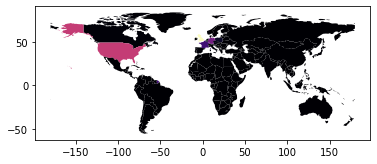

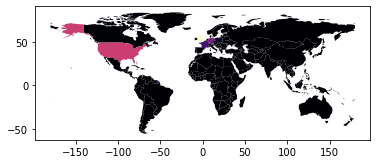

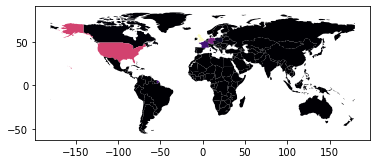

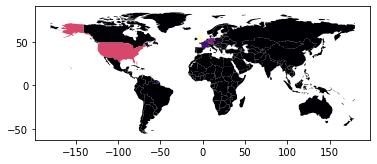

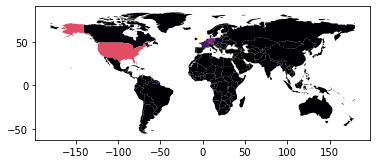

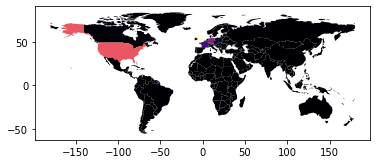

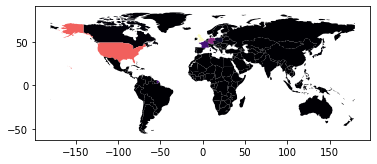

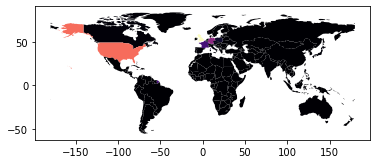

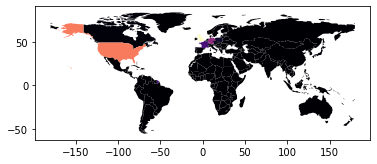

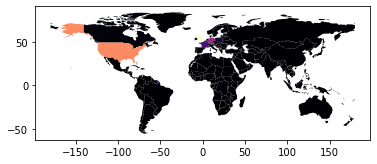

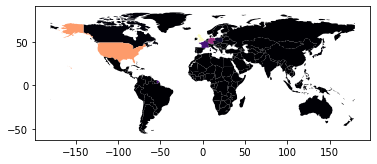

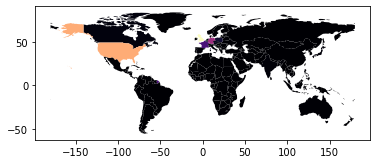

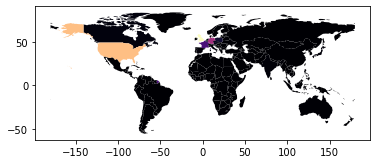

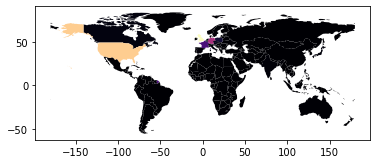

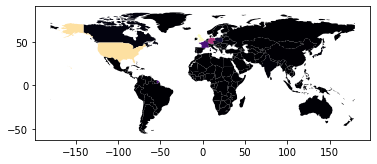

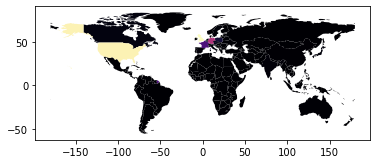

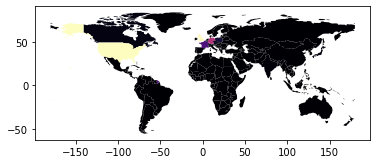

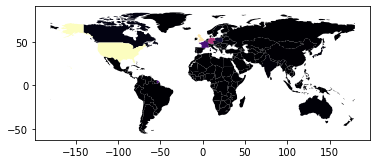

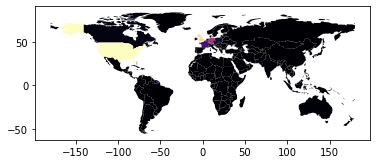

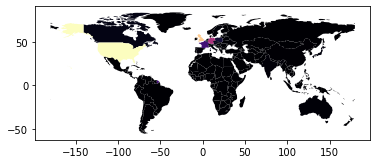

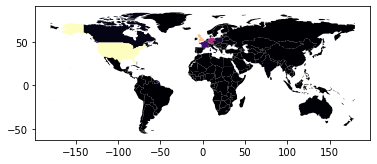

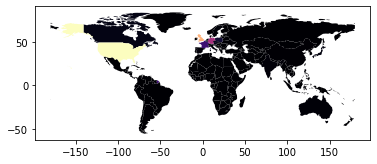

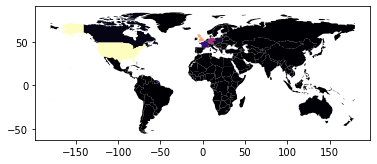

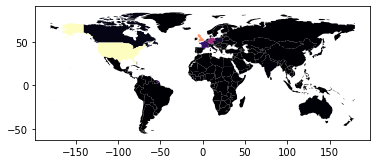

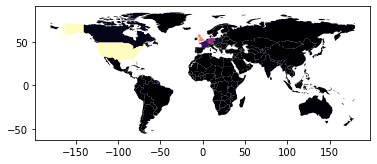

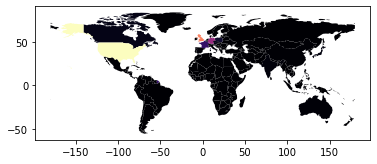

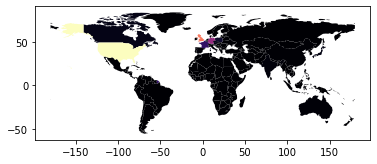

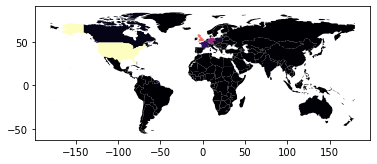

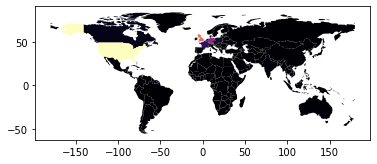

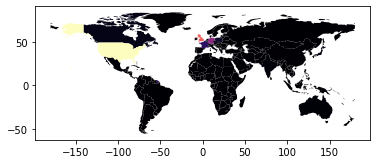

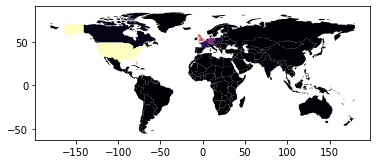

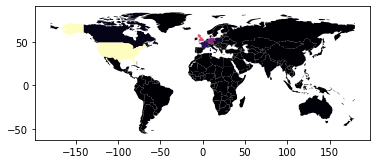

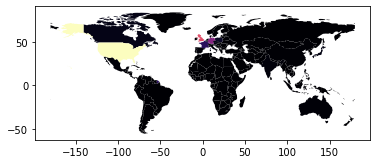

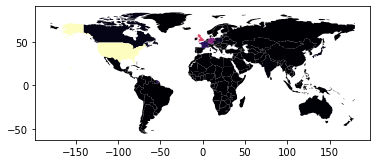

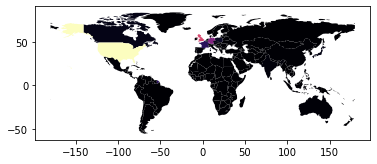

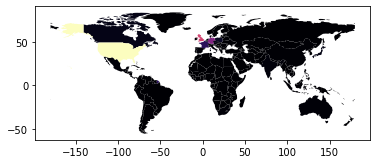

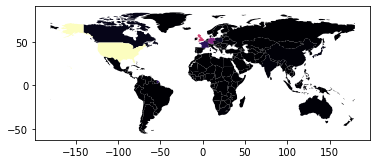

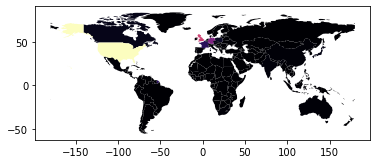

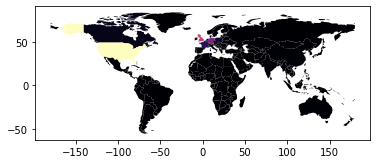

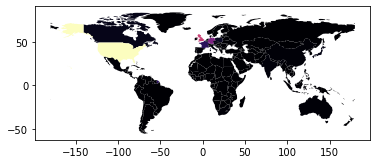

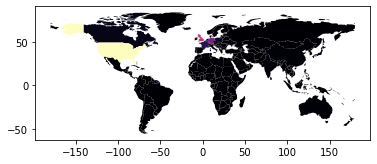

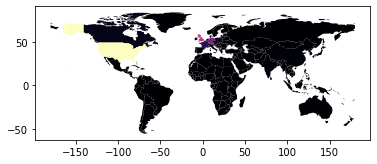

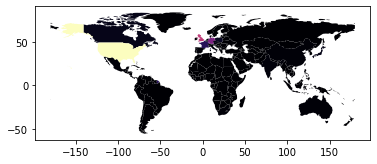

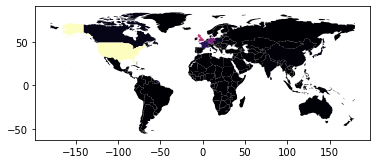

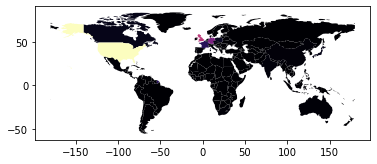

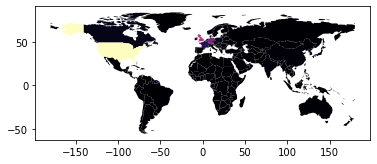

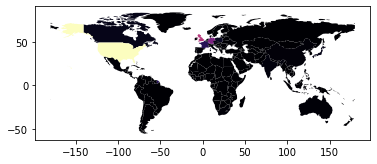

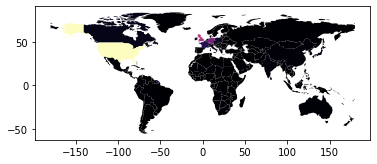

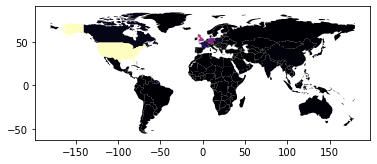

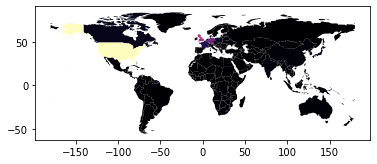

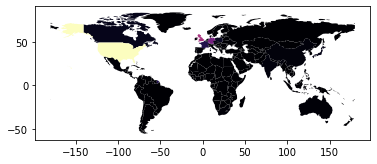

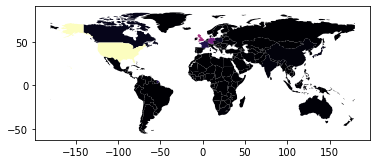

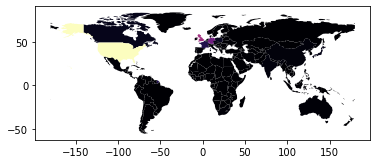

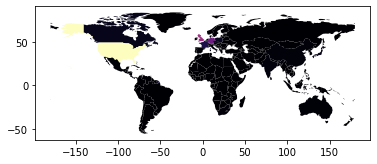

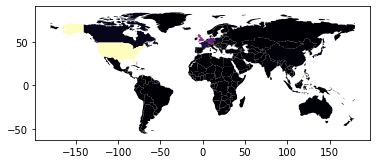

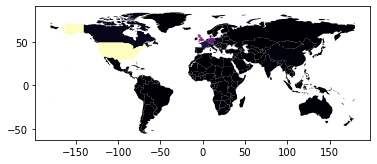

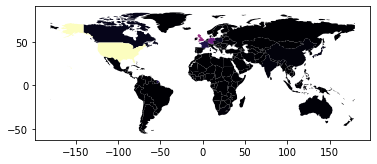

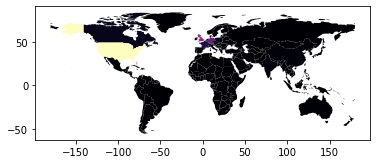

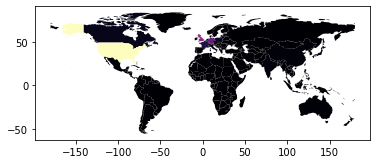

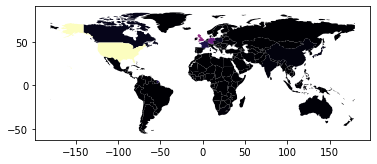

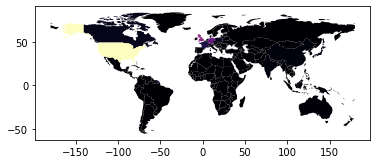

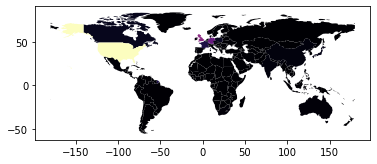

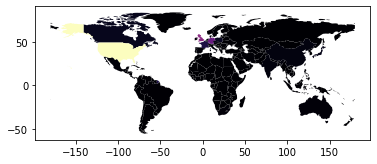

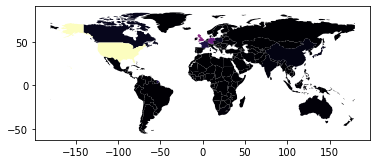

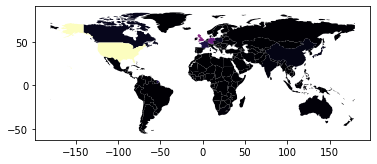

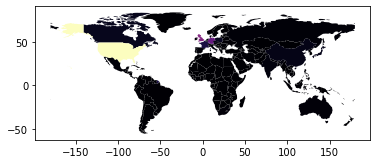

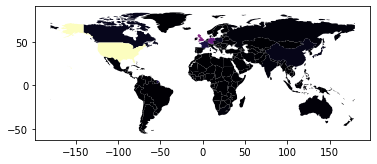

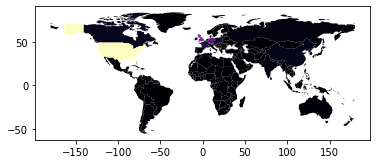

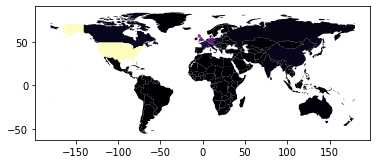

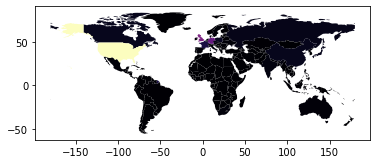

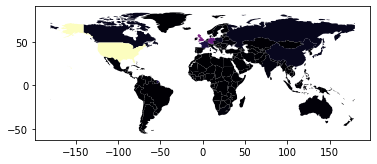

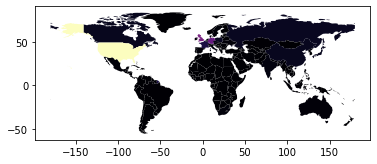

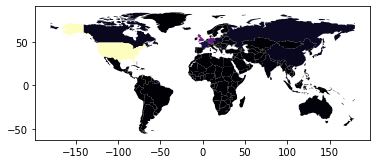

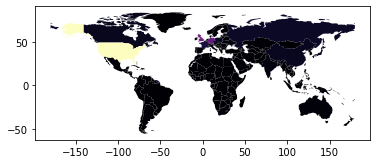

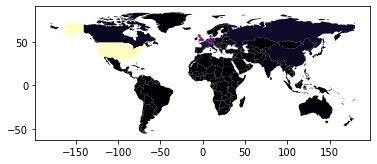

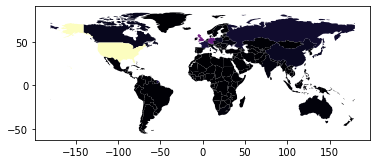

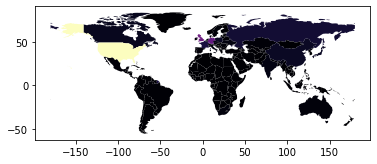

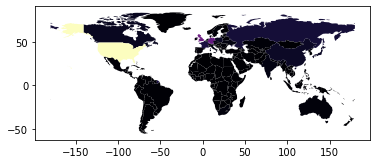

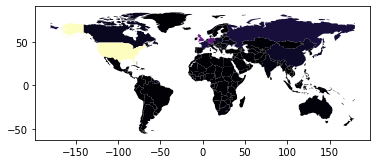

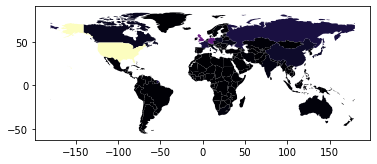

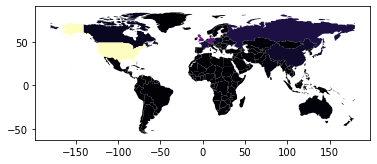

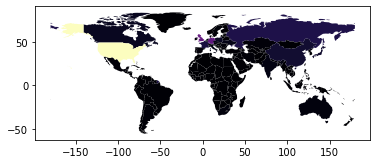

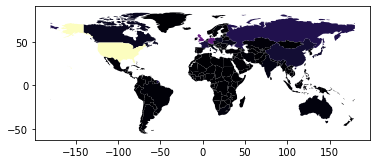

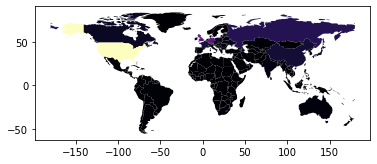

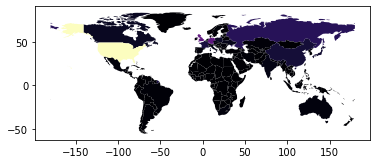

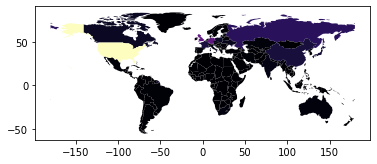

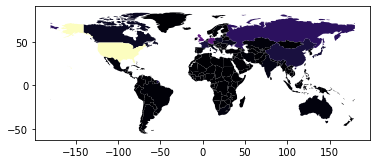

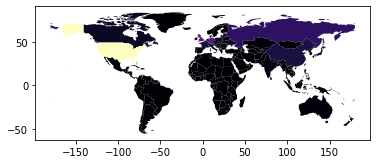

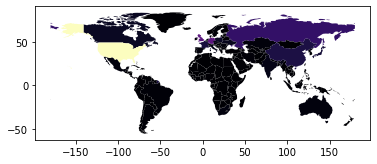

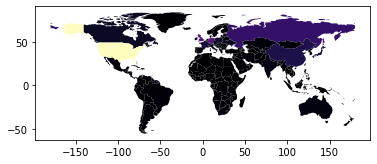

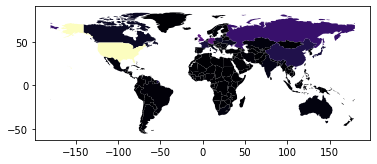

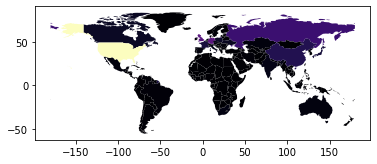

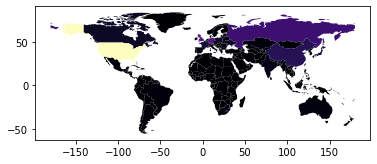

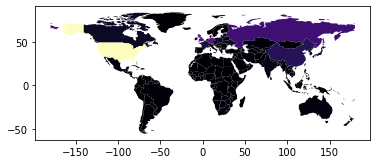

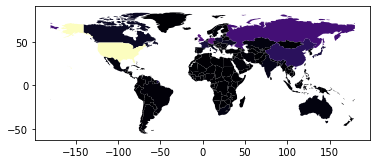

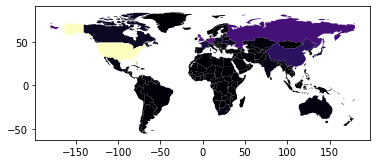

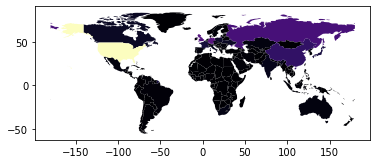

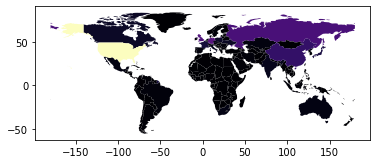

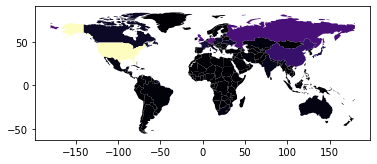

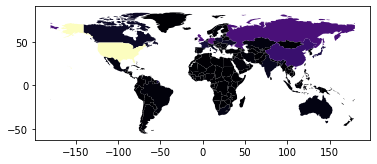

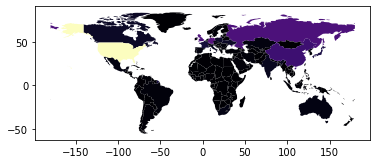

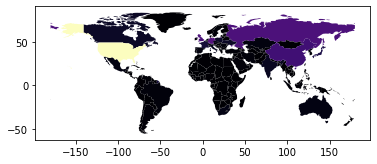

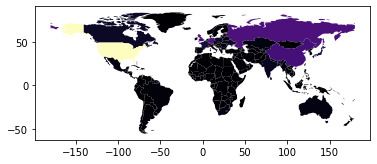

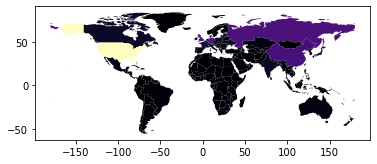

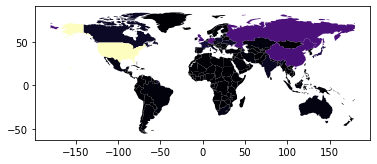

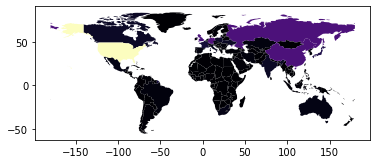

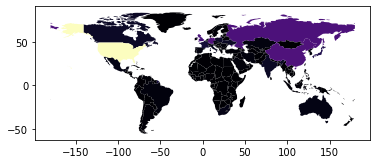

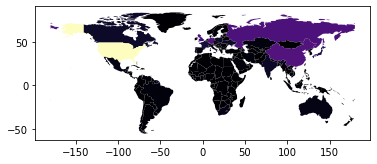

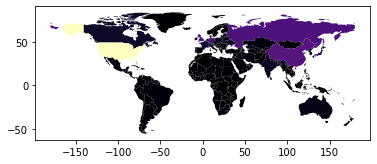

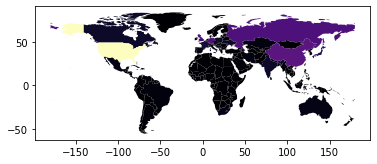

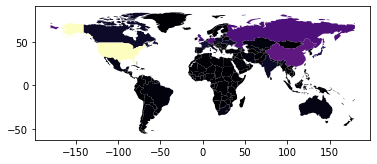

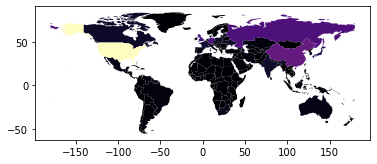

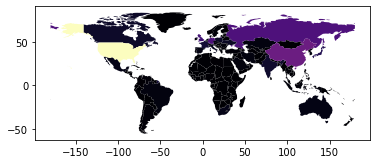

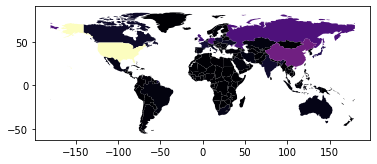

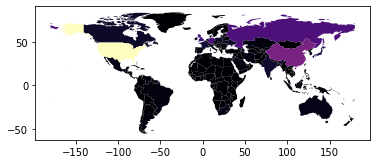

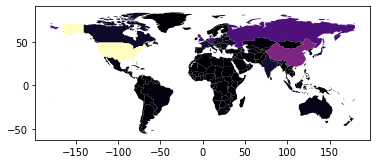

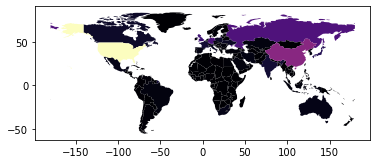

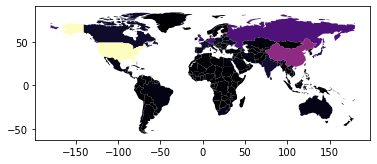

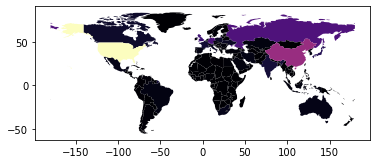

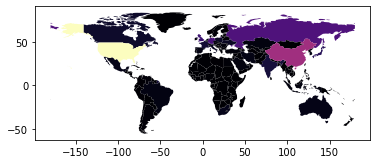

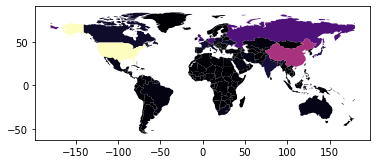

In [115]:
fig, ax = plt.subplots(figsize = (10,10))
for x in range(1800, 2016):
    world.plot(column=str(x), cmap='magma')
    plt.savefig('images/world-' + str(x) + '.png')
    
plt.show()

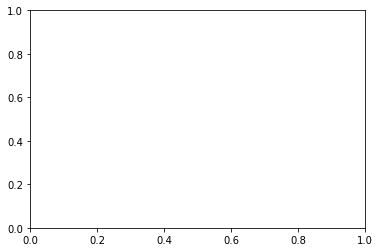

In [116]:
fig, ax = plt.subplots()

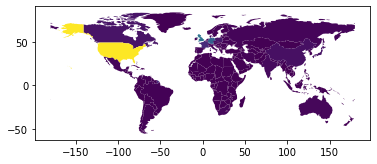

In [117]:
fig, ax = plt.subplots()
temp = world.plot(column='1960', ax=ax)

def animate(year):
    #ax.clear()
    print(year)
    temp = world.plot(column=str(year),ax=ax)
    return temp
    

In [118]:
ani = FuncAnimation(fig, animate, frames=[x for x in range(1800, 2010)], interval=1000)
plt.show()

In [119]:
import os
import moviepy.video.io.ImageSequenceClip
image_folder='images'
fps=1

image_files = [os.path.join(image_folder,img)
               for img in os.listdir(image_folder)
               if img.endswith(".png")]
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile('my_video.mp4')

t:  21%|██████████████▎                                                    | 46/216 [00:00<00:00, 175.79it/s, now=None]

Moviepy - Building video my_video.mp4.
Moviepy - Writing video my_video.mp4



Moviepy - Done !
Moviepy - video ready my_video.mp4
